In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [148]:
df = pd.read_csv('Mall_Customers.csv')

### Removing the customer id feature

In [149]:
df = df.drop(columns=['CustomerID'])

### Label encoding the gender feature

In [150]:
df.loc[df['Gender']=='Male', 'Gender'] = 0
df.loc[df['Gender']=='Female', 'Gender'] = 1

### Different statistics for the dataset

In [151]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Spending Score vs Annual Income')

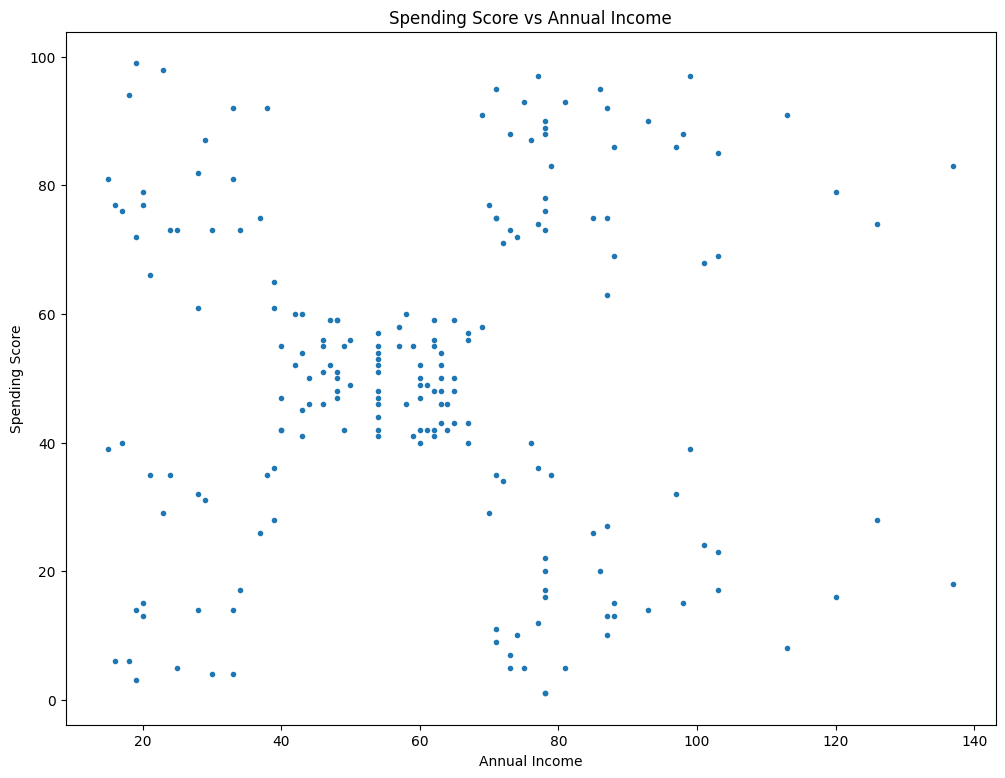

In [152]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 9))
ax.plot(df['Annual Income (k$)'], df['Spending Score (1-100)'], ".")
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_title("Spending Score vs Annual Income")

Text(0.5, 1.0, 'Spending Score vs Age')

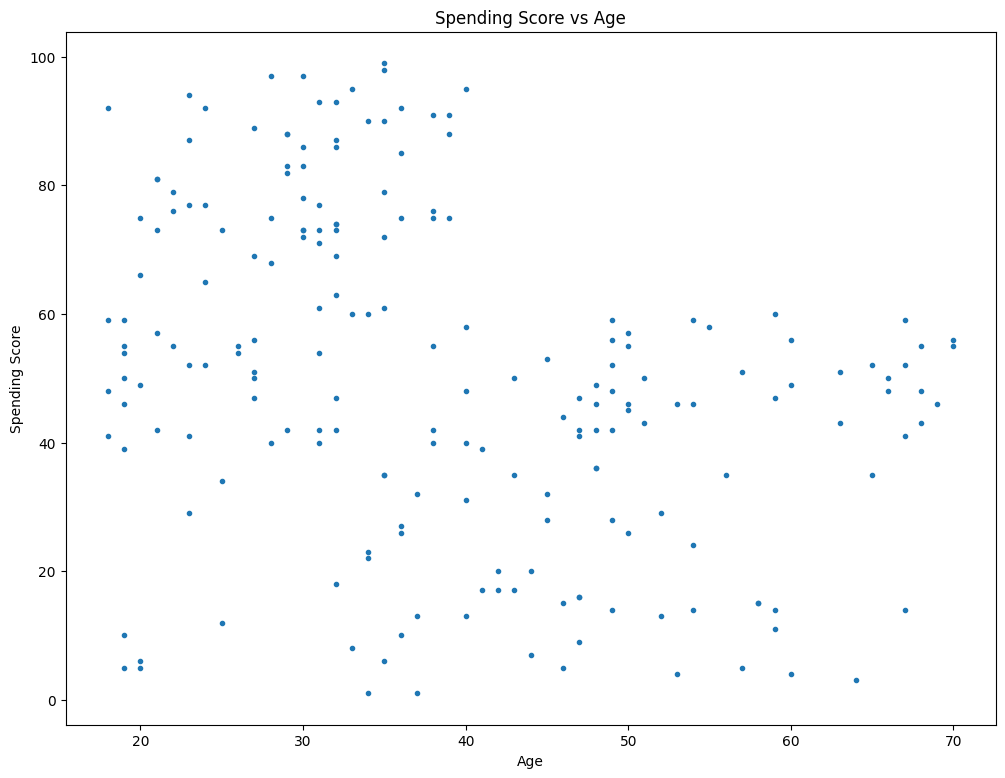

In [153]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 9))
ax.plot(df['Age'], df['Spending Score (1-100)'], ".")
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score")
ax.set_title("Spending Score vs Age")

In [158]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [159]:
X_train, X_test = train_test_split(X, test_size=.2)

In [160]:
sse = []
indices = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=20)
    model.fit(X_train)
    sse.append(model.inertia_)
    indices.append(k)

Text(0.5, 1.0, 'Kmeans Elbow Plot')

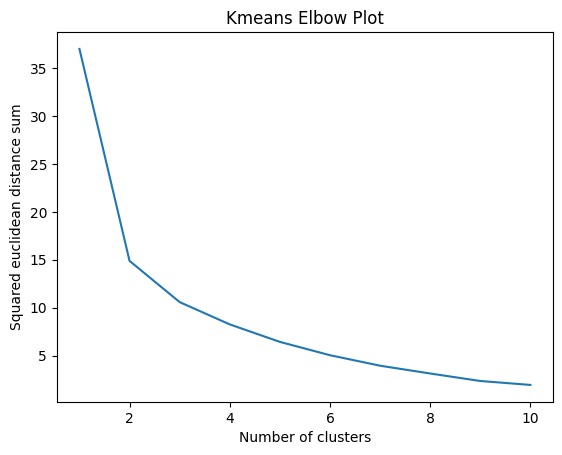

In [161]:
fig, ax = plt.subplots()
ax.plot(indices, sse)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Squared euclidean distance sum")
ax.set_title("Kmeans Elbow Plot")

### There is a sharp elbow at num_clusters = 2

In [162]:
model = KMeans(n_clusters=2, n_init=20)
model.fit(X_train)

KMeans(n_clusters=2, n_init=20)

In [163]:
centers = scaler.inverse_transform(model.cluster_centers_)
center1, center2 = centers[0], centers[1]

### The cluster centers are at

In [164]:
print("cluster-1:")
print(f"Gender probability of female = {center1[0]:.2f}")
print(f"Mean age of cluster 1 = {center1[1]:.2f}")
print(f"Annual income of cluster 1 = {center1[2]:.2f}")
print(f"Spending Score of cluster 1 = {center1[3]:.2f}")

print()

print("cluster-2:")
print(f"Gender probability of female = {center2[0]:.2f}")
print(f"Mean age of cluster 2 = {center2[1]:.2f}")
print(f"Annual income of cluster 2 = {center2[2]:.2f}")
print(f"Spending Score of cluster 2 = {center2[3]:.2f}")

cluster-1:
Gender probability of female = 0.00
Mean age of cluster 1 = 0.44
Annual income of cluster 1 = 0.62
Spending Score of cluster 1 = 0.52

cluster-2:
Gender probability of female = 0.71
Mean age of cluster 2 = 0.31
Annual income of cluster 2 = 0.45
Spending Score of cluster 2 = 0.38
